# Read Data

In [1]:
import pandas as pd
import numpy as np 

data_dir = "naive_bayes/email/input/"
df = pd.read_csv(data_dir + '/spam.csv', encoding='latin-1')  

df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [2]:
df.v2.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: v2, dtype: object

In [3]:
df.v1.head()

0     ham
1     ham
2    spam
3     ham
4     ham
Name: v1, dtype: object

In [4]:
df.shape

(5572, 5)

# Split Data into Training and Testing Sets

In [5]:
from sklearn.model_selection import train_test_split

data_train, data_test, labels_train, labels_test = train_test_split(
    df.v2, #text
    df.v1, #label
    test_size=0.2, 
    random_state=0) #seed number

print (data_train.head())
print (labels_train.head())
print(data_train.shape)
print(data_test.shape)

1114    No no:)this is kallis home ground.amla home to...
3589    I am in escape theatre now. . Going to watch K...
3095    We walked from my moms. Right on stagwood pass...
1012       I dunno they close oredi not... ÌÏ v ma fan...
3320                               Yo im right by yo work
Name: v2, dtype: object
1114    ham
3589    ham
3095    ham
1012    ham
3320    ham
Name: v1, dtype: object
(4457,)
(1115,)


# Transform Data to Fit Model Rrequirement

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
#(sentence id, word is) -> count
#fit: word counting, build word dict, give 1 id to each word
#transform: get count for word in each sentence

vectorizer = CountVectorizer(stop_words='english')
data_train_count = vectorizer.fit_transform(data_train)
data_test_count  = vectorizer.transform(data_test)

print(vectorizer.get_feature_names())
print(data_train_count.toarray())
print(data_train_count.shape)

['00', '000', '000pes', '008704050406', '0089', '0121', '01223585236', '01223585334', '0125698789', '02', '0207', '02072069400', '02073162414', '02085076972', '021', '03', '04', '0430', '05', '0578', '06', '07008009200', '07099833605', '07123456789', '0721072', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07781482378', '07786200117', '077xxx', '078', '07808247860', '07808726822', '07821230901', '078498', '07880867867', '0789xxxxxxx', '07946746291', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '08', '0800', '08000407165', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08452810071', '08452810073', '08452810075over18', '0870', '08700435505150p', '08700469649', '08700621170150p', '08701213186', '08701237397', '08701417012', '08701417012150p', '087016248', '08701752560', '087018728737', '0870241182716', '08702840

C:\Users\Lisa\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# Visualization

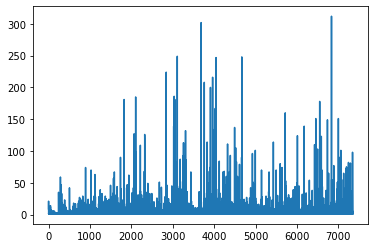

In [21]:
import matplotlib.pyplot as plt

occurence = data_train_count.toarray().sum(axis=0)
plt.plot(occurence)
plt.show()

In [22]:
word_freq_df = pd.DataFrame({'term':vectorizer.get_feature_names(), 'occurrence':occurence})
word_freq_df_sort = word_freq_df.sort_values(by=['occurrence'], ascending=False)
word_freq_df_sort.head(20)

C:\Users\Lisa\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,term,occurrence
6833,ur,312
3685,just,302
3109,gt,249
4667,ok,248
4045,lt,247
2842,free,224
3962,ll,216
3761,know,208
3910,like,200
3034,good,186


# Train Model and Predict

In [25]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(data_train_count, labels_train)
predictions = clf.predict(data_test_count)
print(predictions)

['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']


# Check Accuracy

In [27]:
from sklearn.metrics import accuracy_score
print(accuracy_score(labels_test, predictions))

0.9838565022421525


In [28]:
#to avoid dominate classifier
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(labels_test, predictions))
print(confusion_matrix(labels_test, predictions))

              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       949
        spam       0.97      0.92      0.94       166

    accuracy                           0.98      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.98      0.98      0.98      1115

[[944   5]
 [ 13 153]]


# Cross Validation

In [30]:
from sklearn.model_selection import cross_val_score

data_content = df.v2
data_label = df.v1

vect = CountVectorizer()
data_count = vect.fit_transform(data_content)
cross_val = cross_val_score(clf, data_count, data_label, cv=20, scoring='accuracy')
print(cross_val)

[0.97491039 0.99641577 0.98924731 0.97491039 0.98207885 0.97132616
 1.         0.97132616 0.97849462 0.97849462 0.97849462 0.98207885
 0.97482014 0.98920863 0.98561151 0.98201439 0.94964029 0.99280576
 0.98920863 0.98561151]
